<h1 align="center"><b>Capitolo 1: Introduzione al calcolo numerico</b></h1>

## 1.1) Precisione dei computers

In [1]:
from math import pow, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import numpy as np

Si considerino le due funzioni seguenti, che sono algebricamente equivalenti:
$$ q_1(x) = (x - 1)^7 \quad \quad q_2(x) = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1 $$

Vogliamo calcolare il valore numerico di $q_1(x)$ e $q_2(x)$ con due valori di $x$, ovverosia $1$ e $1,0001$, e confrontare il loro valore esatto con l'errore di arrotondamento. Vogliamo inoltre usare una macchina che lavori con 15 cifre significative. Usando il seguente script in Python, possiamo ottenere i nostri risultati:

In [4]:
def q1(x) -> float:
    return (x - 1) ** 7

def q2(x) -> float:
    return pow(x, 7) - 7 * pow(x, 6) + 21 * pow(x, 5) \
        - 35 * pow(x, 4) + 35 * pow(x, 3) - 21 * pow(x, 2) + 7 * x - 1

def rounding_error(real, machine) -> float:
    return float(real) - float(machine)


# La lista contiene tuple del tipo (x, valore_reale)
for number, expect in [(1, 0), (1.0001, 10**(-28))]:
    # Approssimazione del numero alla 10a cifra decimale
    res1, res2 = "{0:.10g}".format(q1(number)), "{0:.10g}".format(q2(number))
    err1, err2 = rounding_error(expect, res1), rounding_error(expect, res2)
    print(f"With x = {number}, expect {expect}\nQ1 = {res1} | E1 = {err1}\nQ2 = {res2} | E2 = {err2}\n")

With x = 1, expect 0
Q1 = 0 | E1 = 0.0
Q2 = 0 | E2 = 0.0

With x = 1.0001, expect 1e-28
Q1 = 1e-28 | E1 = 0.0
Q2 = 1.776356839e-15 | E2 = -1.7763568389999e-15



Possiamo anche fare un plot delle due funzioni

<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_29144/921127547.py:12: SyntaxWarning: invalid escape sequence '\i'
  plt.title("Valori di $q_1(x)$ e $q_2(x)$ dove $x \in [0,9900, 1,0100]$")


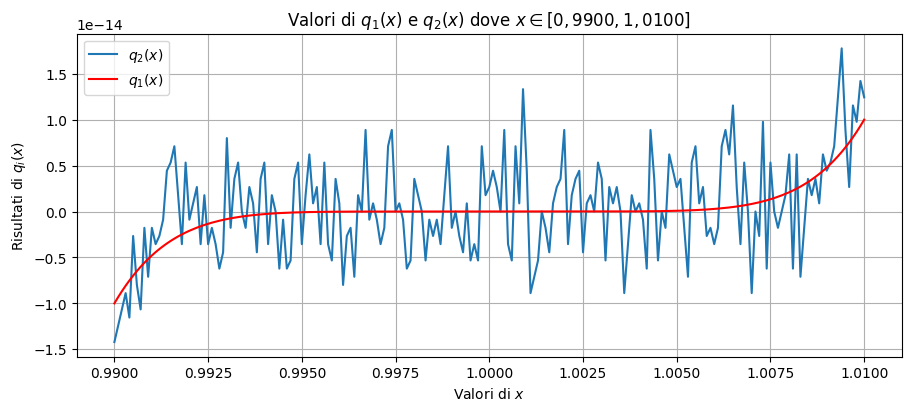

In [15]:
plt.rcParams['axes.facecolor'] = 'white'

x = np.arange(0.9900, 1.0100, 0.0001)
y1 = [q1(i) for i in x]
y2 = [q2(i) for i in x]

plt.figure(figsize=(9, 4), layout='constrained')
plt.plot(x, y2, label="$q_2(x)$")
plt.plot(x, y1, label="$q_1(x)$", color="red")
plt.xlabel("Valori di $x$")
plt.ylabel("Risultati di $q_i(x)$")
plt.title("Valori di $q_1(x)$ e $q_2(x)$ dove $x \in [0,9900, 1,0100]$")
plt.legend()
plt.grid()
savefig('../../notes/assets/image-001.png', transparent=True)
plt.show()


## 1.2) Cancellazione numerica

Consideriamo una qualsiasi equazione di secondo grado:
$$ ax^2 + bx + c = 0$$

Sappiamo che $\Delta = b^2 + 4ac$, e che l'equazione riportata sopra ha due soluzioni reali e distinte:
$$ x_1 = \frac{-b - \sqrt{\Delta}}{2a} \quad \quad \quad x_2 = \frac{-b + \sqrt{\Delta}}{2a} $$

In [ ]:
def solve_f(a, b, c) -> tuple[float, float]:
    delta = pow(b, 2) - 4 * a * c
    x1, x2 = (-b - sqrt(delta)) / (2 * a), (-b + sqrt(delta)) / (2 * a)
    return (x1, x2)

def solve_f_alt(a, b, c) -> tuple[float, float]:
    delta = pow(b, 2) - 4 * a * c
    x1 = (2 * c) / (-b + sqrt(delta))
    x2 = c / (a * x1)
    return (x1, x2)

def f(a, b, c, x) -> float:
    return a * pow(x, 2) + b * x + c


inputs = [[1, 4, 3], [1, -206.5, 0.01021]]
for a, b, c in inputs:
    x1, x2 = solve_f(a, b, c)
    print(f"With a = {a}, b = {b}, c = {c}\n  x1 = {x1}\n  x2 = {x2}\n  f({x1}) = {f(a, b, c, x1)}\n  f({x2}) = {f(a, b, c, x2)}\n")

    x1, x2 = solve_f_alt(a, b, c)
    print(f"Second method\n  x1 = {x1}\n  x2 = {x2}\n  f({x1}) = {f(a, b, c, x1)}\n  f({x2}) = {f(a, b, c, x2)}\n\n")

With a = 1, b = 4, c = 3
  x1 = -3.0
  x2 = -1.0
  f(-3.0) = 0.0
  f(-1.0) = 0.0

Second method
  x1 = -3.0
  x2 = -1.0
  f(-3.0) = 0.0
  f(-1.0) = 0.0


With a = 1, b = -206.5, c = 0.01021
  x1 = 4.944311110932631e-05
  x2 = 206.4999505568889
  f(4.944311110932631e-05) = 5.453536927602087e-13
  f(206.4999505568889) = -3.702003981143065e-13

Second method
  x1 = 4.944311111196724e-05
  x2 = 206.4999505568889
  f(4.944311111196724e-05) = 1.734723475976807e-18
  f(206.4999505568889) = -3.702003981143065e-13


